In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

<AxesSubplot: >

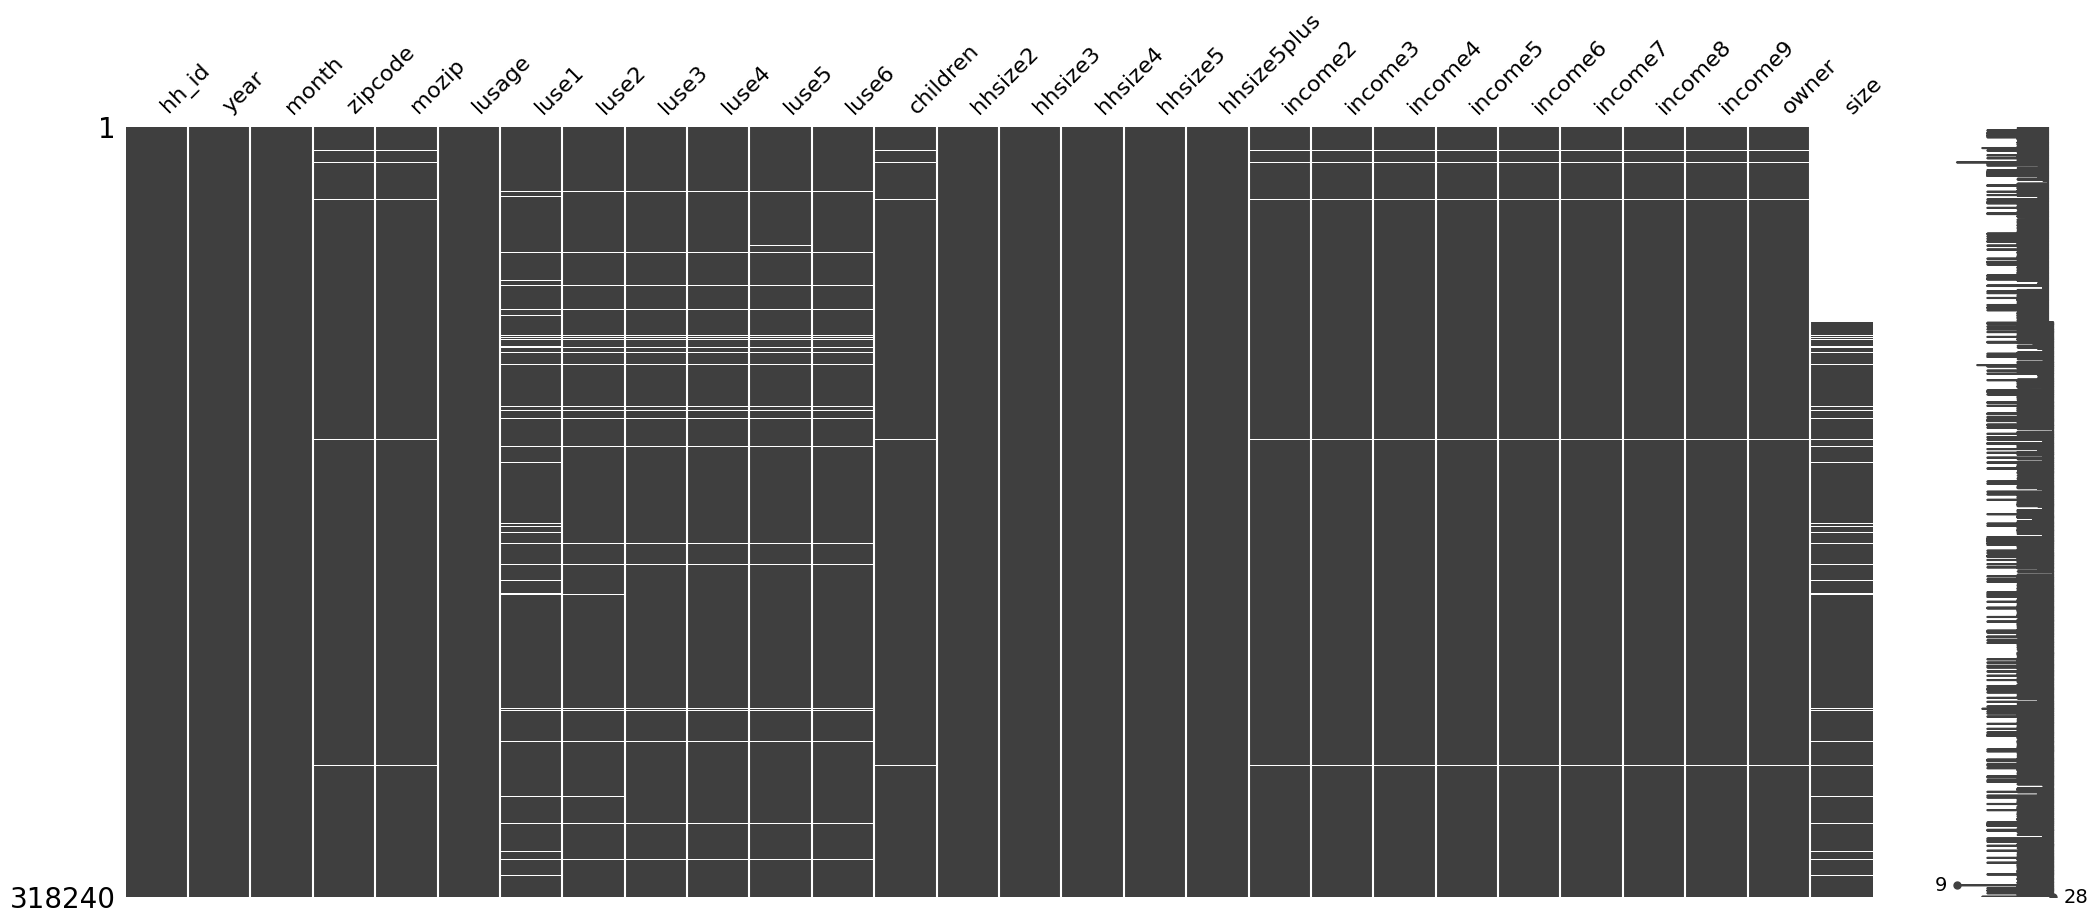

In [31]:
data = pd.read_csv('imputation_test.csv')
msno.matrix(data)

In [7]:
num_rows = data.shape[0]
num_cols = data.shape[1]

mean_size = np.mean(data['size'].notnull())
corr = data.corr()

In [32]:
float(data['size'].notnull().sum())/ float(data['size'].count())
# np.mean(corr['size'][:-1])
# (data.loc[data['size'].notnull()].sum()).sum() / float(data['size'].count())

data.loc[data['size'].notnull(), 'size'].sum() / float(data['size'].count())

# min(data.loc[data['size'].notnull(), 'size'])
# max(data.loc[data['size'].notnull(), 'size'])

7461.814813165279

In [34]:
#new_data = data.drop(data[data['size'] == np.nan])
#data.drop([data['size'].isnull()])
data.loc[data['size'].isnull(),'value_is_NaN'] = 'Yes'
data.loc[data['size'].notnull(), 'value_is_Nan'] = 'No'


In [37]:
#data.drop([data[data['value_is_NaN'] == 'Yes']])
# new_data = data[data['size'].notna()]

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

missing_data = data.loc[:, data.isnull().any()]
features = missing_data.columns

In [34]:
w = np.where(data['size'].notnull())
w[0][0]


80640

In [36]:
sim_imputer = SimpleImputer(missing_values=np.nan, strategy='median')


temp  = data.copy()
temp = pd.DataFrame(sim_imputer.fit_transform(temp))

In [37]:

new_miss_data = pd.DataFrame(sim_imputer.fit_transform(temp.loc[w[0][0] : data.shape[0]]))
new_miss_data.columns = data.columns



In [38]:
X_train = new_miss_data.loc[:, new_miss_data.columns != 'size'].values
y_train = new_miss_data.loc[:, new_miss_data.columns == 'size'].values

print(X_train.shape)
print(y_train.shape)

X_test_miss_data = temp.loc[0:w[0][0]-1]
X_test_miss_data.columns = data.columns
print(type(X_test_miss_data))

X_test = X_test_miss_data.loc[:, X_test_miss_data.columns != 'size'].values
print(X_test.shape)


(237600, 27)
(237600, 1)
<class 'pandas.core.frame.DataFrame'>
(80640, 27)


In [39]:
standard_scaler = preprocessing.StandardScaler()
X_S = standard_scaler.fit_transform(X_train)
T_S = standard_scaler.fit_transform(X_test)
reg = RandomForestRegressor()
reg = reg.fit(X_S, y_train.ravel())
pred = reg.predict(T_S)
print(pred.shape)

(80640,)


In [109]:
print(pred)

[15737.74 15739.14 15739.14 ...  7113.35  7113.35  8725.97]


In [117]:
print(type(pred))
print(type(y_train))

final_size = np.append(pred, y_train)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [118]:
new_data = data.copy()
new_data['size'] = final_size

<AxesSubplot: >

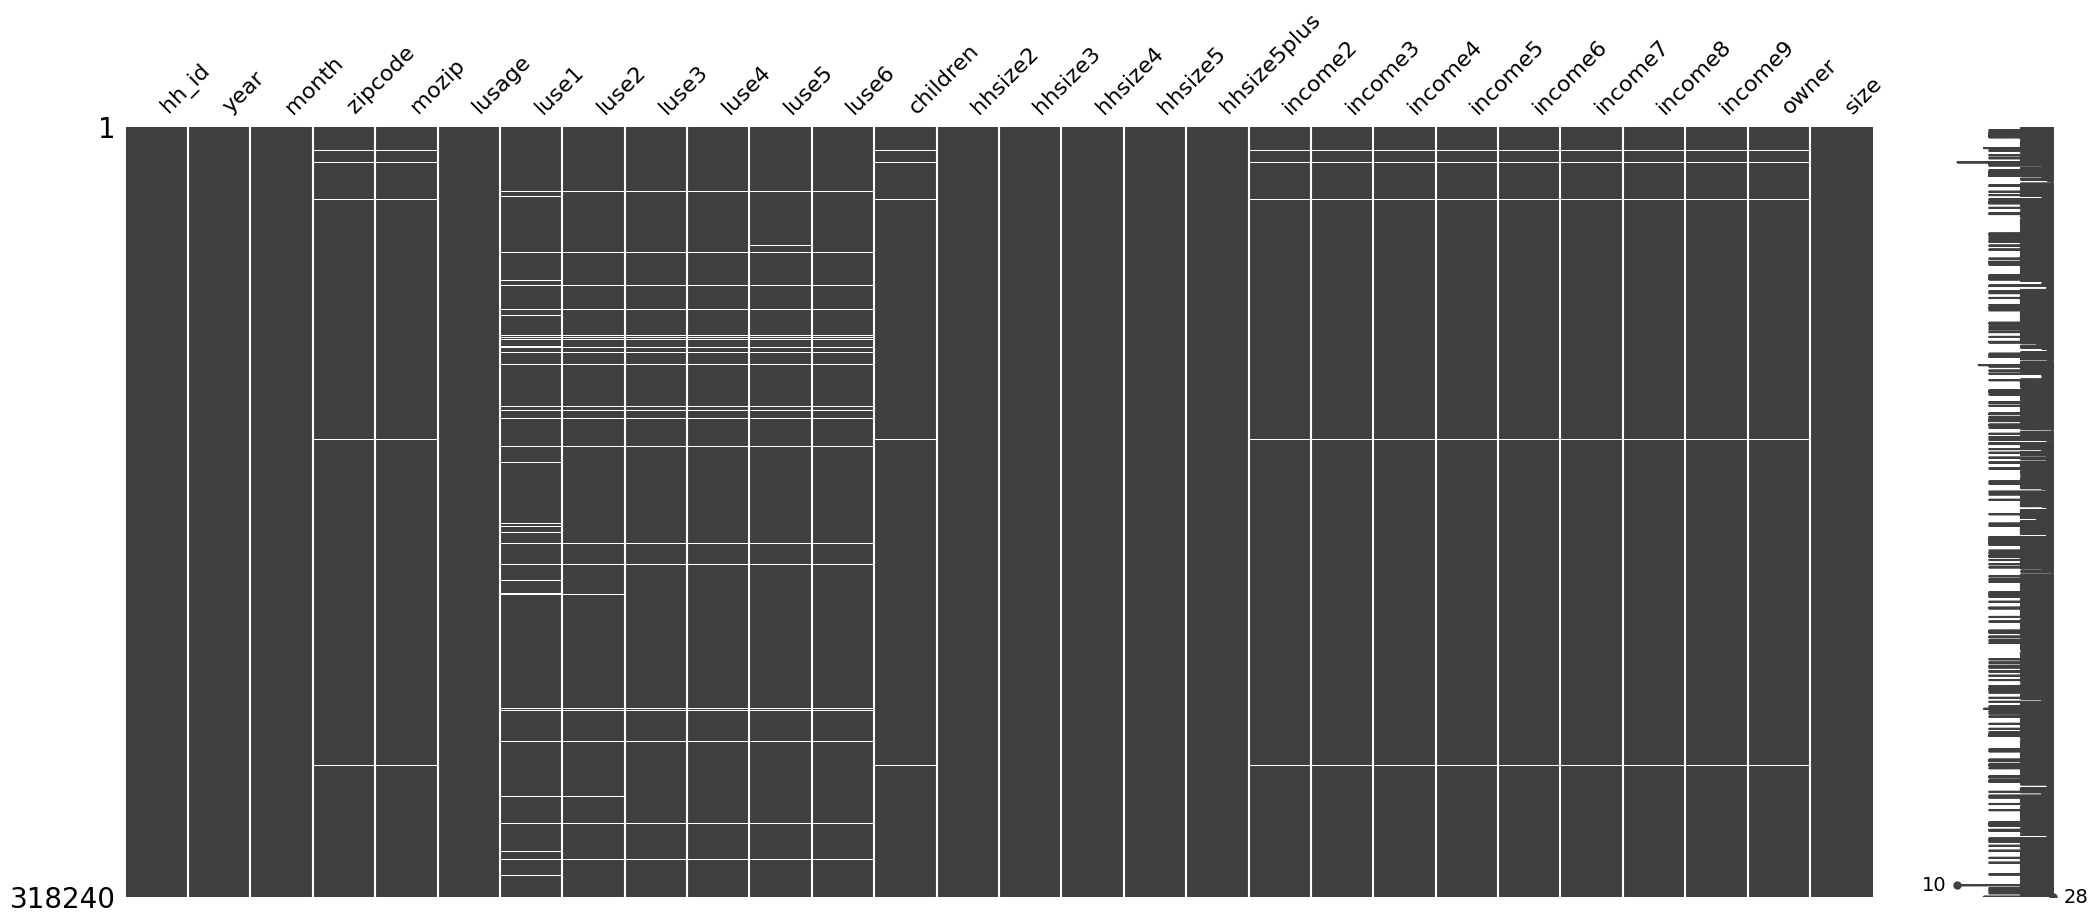

In [119]:
msno.matrix(new_data)

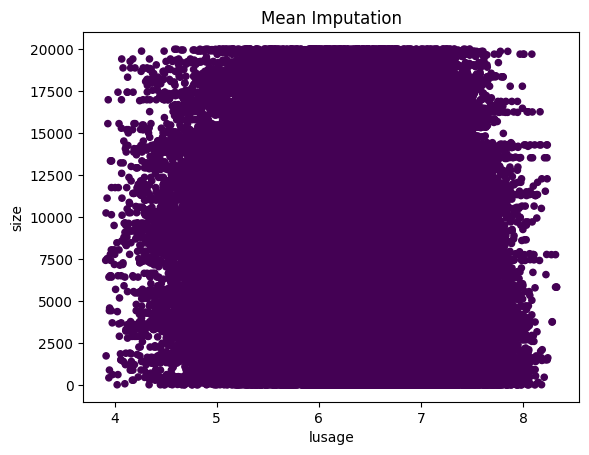

In [122]:
fig = plt.Figure()
null_values = new_data['size'].isnull()
fig = new_data.plot(x="lusage", y='size', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)


In [29]:
new_data.loc[new_data['size'].notnull(), 'size'].sum() / float(new_data['size'].count())

NameError: name 'new_data' is not defined

# Find Correlations with 'size' column and remove the columns that are not related with 'size'
# Find relation between 'size' and other columns whether linear or quadratic ...

## Select features that I am going to measure and compare after time.
## Measure features about train dataset(complete data & incomplete data)

Imputation with relations between columns with completed data

Imputation with realtions between columns with incompleted data(contain missing values)

Measure the features with imputed data and evaluate